# Sampling Points on the Sphere

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

In [3]:
# Solid angle of the sphere in steradians
OMEGA = 4 * np.pi

# radians to arcseconds
RADIANS_TO_ARCSEC = 180 * 3600 / np.pi

# Desired angular resolution in arcseconds
epsilon = 3600 * 10

# Number of points per sphere to be sampled 
n = int(OMEGA / (epsilon / RADIANS_TO_ARCSEC)**2)

In [5]:
goldenRatio = (1 + 5**0.5)/2
i = np.arange(0, n)
theta = 2 * np.pi * i / goldenRatio
phi = np.arccos(1 - 2*(i+0.5)/n)
x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi);

In [14]:
import json
import pickle

In [21]:
for idx in range(n):
    theta = 2 * np.pi * idx / goldenRatio
    phi = np.arccos(1 - 2*(idx + 0.5) / n)
    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)
    res = {'id': idx, 
           'pointing': [x, y, z],
           'phi': 0,
           'psi': 0,
           'params': [40, 0, 0, 0],
           'exposures': [38949375 for _ in range(100)],
           }
    # write to json
    # with open(f'/Users/kjnapier/Desktop/test/point-{idx}.json', 'w') as f:
    #     json.dump(res, f, indent=4)

    with open(f'/Users/kjnapier/Desktop/test/point-{idx}.bin', 'wb') as f:
        pickle.dump(res, f)
        #f.write(bytearray(res))

In [17]:
p1 = np.array([x, y, z]).T[0]
p2 = np.array([x, y, z]).T[1]
p3 = np.array([x, y, z]).T[2]

In [29]:
ras = []
decs = []
for idx in range(1000):
    xx, yy, zz = np.array([x, y, z]).T[idx]
    ra = np.arctan2(yy, xx)
    dec = np.arcsin(zz)
    ras.append(ra)
    decs.append(dec)

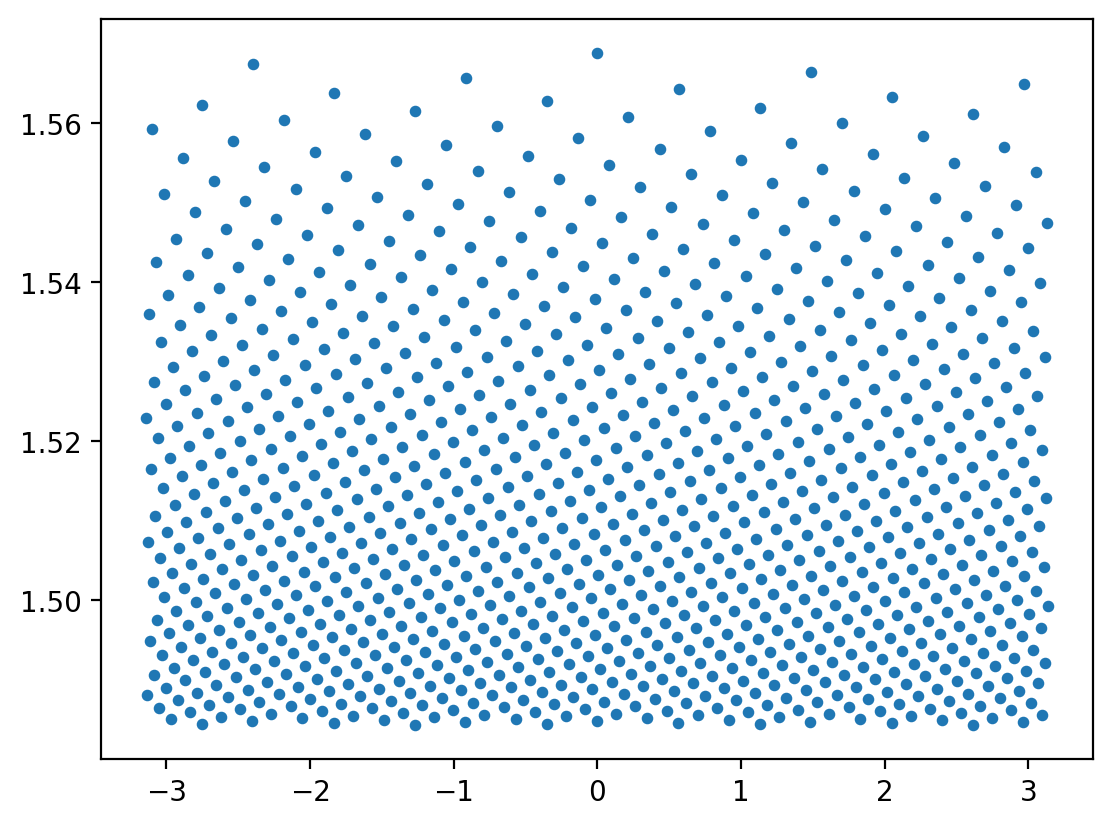

In [30]:
plt.scatter(ras, decs, s=10)

(-0.55, 0.55, -0.05, 1.05)

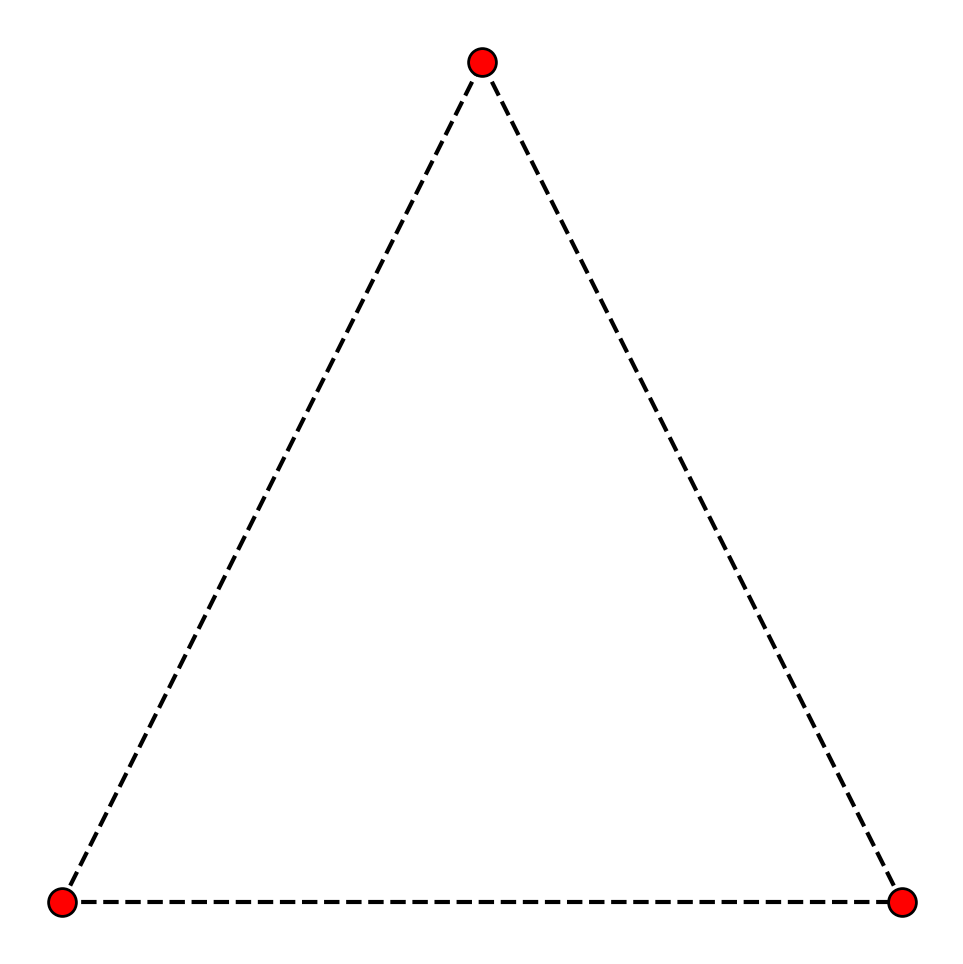

In [11]:
vertices = [(0, 1), (0.5, 0), (-0.5, 0)]
xs, ys = np.array(vertices).T

fig, ax = plt.subplots(figsize=(6, 6))

# connect all points
ax.plot(xs, ys, '--', color='black')
# connect first and last point
ax.plot([xs[0], xs[-1]], [ys[0], ys[-1]], '--', color='black')

ax.scatter(xs, ys, color='red', s=100, zorder=10, edgecolor='black')
ax.set_aspect('equal')
ax.axis('off')
# fig.savefig('/Users/kjnapier/Desktop/triangle.pdf')